# Ordinary Least Squares

Ordinary Least Squares is a method for predicting a linear model such that the model minimizes the squared sums of the residuals. The residuals are defined as the distance from each point to the linear model. This method assumes all data points are independent.
The complexity of this computation is O(np^2) where n = number of samples and p = number of variables.

In [1]:
%matplotlib inline
from sklearn import linear_model, datasets
import numpy as np
import matplotlib.pyplot as plt

Use a built in dataset to examine the linear model function

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes_X = diabetes.data[:, np.newaxis, 2] #select a singe variable to analyze

Split the data into training and testing and get appropriate targets

In [4]:
diabetesX_train = diabetes_X[:-20]
diabetesX_test = diabetes_X[-20:] 

In [5]:
diabetesY_train = diabetes.target[:-20]
diabetesY_test = diabetes.target[-20:]

Create a linear regression object that we can use to fit the data (this step is independent of the data)

In [6]:
reg = linear_model.LinearRegression()

In [7]:
reg.fit(diabetesX_train, diabetesY_train) #fit the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

the fit function will store coeficient(s) as reg.coef_, and the y intercept as reg.intercept_. coefficents are stored as an array. The number of coefficents is equal to the number of predictive variables that are being used. In this example we are only using one variable, so there is only one coefficient. 

In [8]:
for x in reg.coef_:
    print 'Coefficient:', x

Coefficient: 938.237861251


In [9]:
print 'intercept:', reg.intercept_

intercept: 152.918861826


Use the test data to calculate the mean squared error (MSE). This will show how well the linear model based on the training data predicts the test data. The closer to zero the better the estimator (linear model) is.

In [10]:
mse = np.mean((reg.predict(diabetesX_test) - diabetesY_test) **2)
print 'MSE:', mse

MSE: 2548.07239873


The variance score is a measurement of how well the model fits the data. The closer to 1 the better the model.

In [11]:
vs = reg.score(diabetesX_test, diabetesY_test)
print 'variance score:', vs

variance score: 0.472575447982


# Ridge Regression Analysis

Ridge regression is very similar to least squared, but it uses an additional parameter to counteract over or under fitting due to a large number of variables. As the number of variables in a model increases the model can become very sensitive to small changes as it will identify local curves. This will cause the variance of the model as a whole to become very large. This is known as the Bias-Variance Tradeoff. To control for this the ridge regression will constrain the coefficients.

In [12]:
diabetes_X = diabetes.data

In [13]:
diabetesX_train = diabetes_X[:-20]
diabetesX_test = diabetes_X[-20:] 

In [14]:
diabetesY_train = diabetes.target[:-20]
diabetesY_test = diabetes.target[-20:]

To test the best alpha for the data graph multiple instances of alpha. In general, the higher the alpha the more contrained the coefficients will be and thus they will have little to no effect on the model. The smaller the alpha the less contrained the coefficients are and the closer they will be to the least squared result

In [15]:
n_alphas = 200
alphas = np.logspace(-5, 2, n_alphas)

create the ridge model to fit the data to

In [16]:
clf = linear_model.Ridge(fit_intercept = False)

In [17]:
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(diabetesX_train, diabetesY_train)
    coefs.append(clf.coef_)

plot results

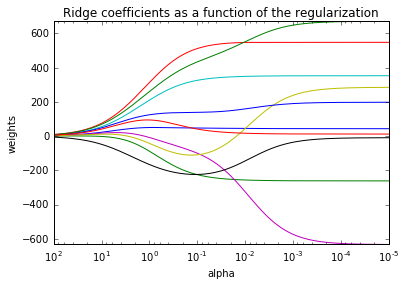

In [18]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Choose several different alphas based on the plot above and see which one has the best outcome using the built in cross validation function

In [19]:
a = [100, 10, 1, .1, .01, .001, .0001]
reg = linear_model.RidgeCV(alphas= a)
reg.fit(diabetesX_train, diabetesY_train)
print 'alpha:', reg.alpha_

alpha: 0.01


## Decision Tree

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [21]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [22]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [23]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

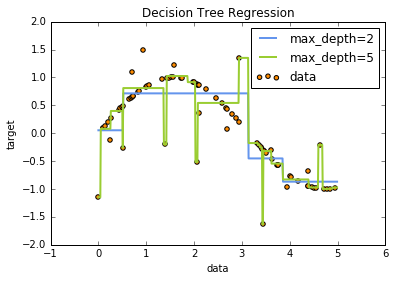

In [24]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()